In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_excel("/content/Union_Carbide_Tech_Report.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [6]:
z=np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


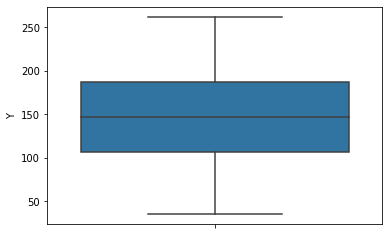

In [7]:
sns.boxplot(y=data['Y'])

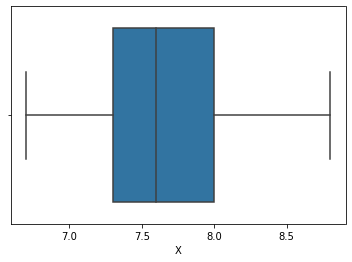

In [4]:
sns.boxplot(x=data['X'])

In [8]:
f_data = data[(z<3).all(axis=1)]
f_data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [9]:
df = data
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)
    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [10]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

32
32
No outliners


In [11]:
#normalisation
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.428571,0.644970
1,0.190476,0.745562
2,0.714286,0.751479
3,0.380952,0.828402
4,0.333333,0.727811


In [12]:
train_data,test_data = train_test_split(data_n,test_size=0.1)


print(len(train_data))
train_data.head()

28


,X,Y
25,0.476190,0.384615
28,0.285714,0.165680
21,1.000000,0.585799
23,0.571429,0.029586
17,0.190476,0.958580


In [13]:
xar = np.array(train_data['X'])
yar = np.array(train_data['Y'])

In [16]:
#training the data
from sympy import *
m, c = symbols('m c')
exp = '0.5*(y-m*x-c)**2'
exp_diff = Derivative(exp,m)
dfm = exp_diff.doit()
exp_diff = Derivative(exp,c)
dfc = exp_diff.doit()
print(f'1st order derivative w.r.t m and c :\nde/dm = {dfm} \nde/dc = {dfc}')
err=[]
#step 1:
m1=1.0
c1=-1.0
learning_rate=0.1
itr=100


for i in range(0,itr):
  er=0
  for j in range(0,len(xar)):
    er+=((yar[j]-(m1*xar[j])-c1))**2
    #step 2:
    m,c,x,y = symbols('m c x y')
    dedm = dfm.subs(m,m1)
    dedm = dedm.subs(c, c1) 
    dedm= dedm.subs(x, xar[j]) 
    dedm = dedm.subs(y, yar[j])
    dedm = round(dedm,2)
    dedc = dfc.subs(c,c1)
    dedc = dedc.subs(m, m1) 
    dedc = dedc.subs(x, xar[j]) 
    dedc = dedc.subs(y, yar[j])
    dedc = round(dedc,2)
    #step 3:
    dm = (-0.1)*learning_rate*dedm
    dc = (-0.1)*learning_rate*dedc
    #step 4:
    m1 = m1+dm
    m1 = round(m1,2)
    c1 = c1+dc
    c1 = round(c1,2)
    er=(1/(2*len(train_data['X'])))*(er)
    err.append(er)

print(f'min value of m = {m1} \nmin value of c = {c1}')

1st order derivative w.r.t m and c :
de/dm = -1.0*x*(-c - m*x + y) 
de/dc = 1.0*c + 1.0*m*x - 1.0*y
min value of m = 0.29 
min value of c = 0.32


In [15]:
#RMSE for training data
train_data_pred =  m1*train_data['X'] + c1
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
mse

0.11790141886404235

In [17]:

#test data
test_data_pred = m1 *test_data['X'] + c1
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
mse2

0.054805446113799186

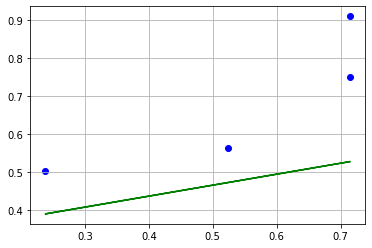

In [18]:
#ploting graph
plt.scatter(test_data['X'],test_data['Y'],color='blue')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [19]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

#predicting the output
x =x1 = float(input("enter pH value of well water :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"Based on pH the bicarbonates of well water {x1} is : {y}")

enter pH value of well water :7.6
Based on pH the bicarbonates of well water 7.6 is : 123.057407924107
